# Implementation 1: CNN model

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


To access the dataset, plick click [here](https://drive.google.com/drive/folders/1lJiRkmPPfvwAyMVUfUunKgmYeorQ5R3e?usp=sharing) and add the shorcut named 'FYP_Dataset' to your drive.

In [ ]:
%cd /content/drive/My Drive/FYP_Dataset/data-1/

/content/drive/My Drive/FYP_Dataset/data-1


### Directory Definition

In [ ]:
import os
cwd = os.getcwd()
data1_dir = os.path.join(cwd, 'imgs')
train_dir = os.path.join(cwd, 'train')
val_dir = os.path.join(cwd, 'validation')
test_dir = os.path.join(cwd, 'test')

### Data Generator

In [ ]:
from keras.utils import to_categorical
from keras.api._v2.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        'validation',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

# Convert integer labels to one-hot encoded vectors
train_labels = to_categorical(train_generator.classes, num_classes=36)
validation_labels = to_categorical(validation_generator.classes, num_classes=36)
test_labels = to_categorical(test_generator.classes, num_classes=36)

Found 573 images belonging to 36 classes.
Found 144 images belonging to 36 classes.
Found 36 images belonging to 36 classes.


In [ ]:
import numpy as np

# assume that `train_generator` is your training data generator
train_labels = train_generator.classes
print(np.unique(train_labels))  # should show 36 unique labels

# assume that `val_generator` is your validation data generator
validation_labels = validation_generator.classes
print(np.unique(validation_labels))  # should show 36 unique labels


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


### CNN Model

In [ ]:
import tensorflow as tf
# replace tensorflow.keras with keras.api._v2.keras
from keras.api._v2.keras import layers
from keras.api._v2.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Define the CNN model architecture
model = tf.keras.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(36, activation='softmax')
])

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 16)       0

In [ ]:
filepath = '/content/drive/MyDrive/FYP Year 3/Coding/models/m9.h5'

In [ ]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

# define early stopping and model checkpoint callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True)

# train the model with early stopping and model checkpoint
history = model.fit(train_generator, epochs=30, validation_data=validation_generator, callbacks=[early_stop, model_checkpoint])

# Print the training and validation accuracy for each epoch
for epoch, acc, val_acc in zip(range(len(history.history['accuracy'])), history.history['accuracy'], history.history['val_accuracy']):
    print('Epoch {} - Training Accuracy: {:.2f}% - Validation Accuracy: {:.2f}%'.format(epoch+1, acc*100, val_acc*100))


Epoch 1/30
18/18 [==============================] - 197s 11s/step - loss: 3.4234 - accuracy: 0.1134 - val_loss: 3.0973 - val_accuracy: 0.1806
Epoch 2/30
18/18 [==============================] - 55s 3s/step - loss: 3.0486 - accuracy: 0.1798 - val_loss: 2.8188 - val_accuracy: 0.2500
Epoch 3/30
18/18 [==============================] - 57s 3s/step - loss: 2.7964 - accuracy: 0.2740 - val_loss: 2.5597 - val_accuracy: 0.3958
Epoch 4/30
18/18 [==============================] - 58s 3s/step - loss: 2.5366 - accuracy: 0.3211 - val_loss: 2.2301 - val_accuracy: 0.5347
Epoch 5/30
18/18 [==============================] - 58s 3s/step - loss: 2.3587 - accuracy: 0.3700 - val_loss: 2.1171 - val_accuracy: 0.4722
Epoch 6/30
18/18 [==============================] - 57s 3s/step - loss: 2.1896 - accuracy: 0.4154 - val_loss: 1.8485 - val_accuracy: 0.5764
Epoch 7/30
18/18 [==============================] - 52s 3s/step - loss: 2.0024 - accuracy: 0.4590 - val_loss: 1.7421 - val_accuracy: 0.6250
Epoch 8/30
18/18 [

In [ ]:
import keras
best_model = keras.models.load_model(filepath)

In [ ]:
# Evaluate the model
test_loss, test_acc = best_model.evaluate(test_generator)
print('Test accuracy:', test_acc)

3/3 [==============================] - 5s 2s/step - loss: 1.6742 - accuracy: 0.5833
Test accuracy: 0.5833333134651184


In TensorFlow, model.evaluate() and model.predict() are two different methods that serve different purposes.

model.predict() is used to make predictions on new data after a model has been trained. It takes input data as its argument and returns the predicted output from the model. The returned value is typically a tensor or a numpy array of predicted values.

On the other hand, model.evaluate() is used to evaluate the performance of a model on a test dataset. It takes input data and ground truth labels as its arguments and returns a tuple of the model's loss and accuracy on the input data. This method is typically used to assess the overall performance of a model and compare it with other models.

model.eval() is a method in TensorFlow that is typically used during the evaluation phase of a model. It sets the model's training state to evaluation mode, which affects certain layers in the model such as dropout and batch normalization layers. During evaluation, these layers behave differently than during training to prevent overfitting. model.eval() is usually called before model.evaluate() to ensure that the model is in the correct state for evaluation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

test_images, test_labels = test_generator.next()

print(test_generator.samples)


36


In [ ]:
# get the predictions for the test images
predictions = best_model.predict(test_images)

# convert the one-hot encoded labels back to integer labels
test_labels = np.argmax(test_labels, axis=1)
predicted_labels = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 358ms/step


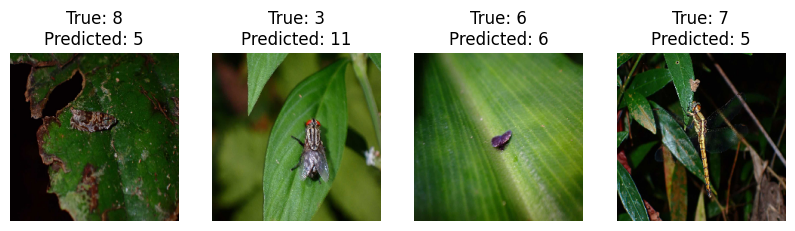

In [ ]:
# plot the first five test images along with corresponding training images that have the same true label
fig, axs = plt.subplots(1, 4, figsize=(10, 5))
for i in range(4):
    idx = random.randint(0, 15)
    # plot the original image
    axs[i].imshow(test_images[idx])
    axs[i].axis('off')
    # get the original and predicted labels
    true_label = test_labels[idx]
    predicted_label = predicted_labels[idx]
    # add the labels to the plot
    axs[i].set_title('True: {}\nPredicted: {}'.format(true_label, predicted_label))

    # train_dir = os.path.join(cwd, 'train')
    # label_dir = os.path.join(train_dir, str(true_label))
    # train_image_paths = os.listdir(label_dir)
    # train_image_path = os.path.join(label_dir, train_image_paths[0])
    # # plot the corresponding train image
    # axs[1][i].imshow(plt.imread(train_image_path))
    # axs[1][i].axis('off')
    # # add the label to the plot
    # axs[1][i].set_title('Train: {}'.format(true_label))


plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# calculate the evaluation metrics for the test set
test_accuracy = accuracy_score(test_labels, predicted_labels)
test_f1_score = f1_score(test_labels, predicted_labels, average='weighted')
test_precision = precision_score(test_labels, predicted_labels, average='weighted', zero_division=0)
test_recall = recall_score(test_labels, predicted_labels, average='weighted', zero_division=0)


# print the evaluation metrics
print('Test Accuracy: {:.2f}%'.format(test_accuracy*100))
print('Test F1 Score: {:.2f}%'.format(test_f1_score*100))
print('Test Precision: {:.2f}%'.format(test_precision*100))
print('Test Recall: {:.2f}%'.format(test_recall*100))


Test Accuracy: 56.25%
Test F1 Score: 46.87%
Test Precision: 42.71%
Test Recall: 56.25%
